In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import csv
import seaborn as sns

In [2]:
DF2 = pd.read_csv('VelErrorVSAngle.csv')
DF2 = DF2.drop(columns=['Unnamed: 0'])
DF2.loc[DF2['Geometry']==3 ,'Geometry']='Triangle'
DF2.loc[DF2['Geometry']==4 ,'Geometry']='Square'
DF2.loc[DF2['Geometry']==5 ,'Geometry']='Pentagon'
DF2.loc[DF2['Geometry']==6 ,'Geometry']='Hexagon'
print(DF2)
print(DF2.columns)

      Vel_ms    Err_ms    N  Geometry
0   1.263637  0.284409  1.0  Triangle
1   1.585630  0.107019  1.0  Triangle
2   2.070663  0.215943  1.0  Triangle
3   2.571993  0.285693  1.0  Triangle
4   3.182914  0.306290  1.0  Triangle
..       ...       ...  ...       ...
91  2.571993  0.059509  5.0   Hexagon
92  3.182914  0.074662  5.0   Hexagon
93  3.753223  0.085065  5.0   Hexagon
94  4.336266  0.097828  5.0   Hexagon
95  4.914135  0.117080  5.0   Hexagon

[96 rows x 4 columns]
Index(['Vel_ms', 'Err_ms', 'N', 'Geometry'], dtype='object')


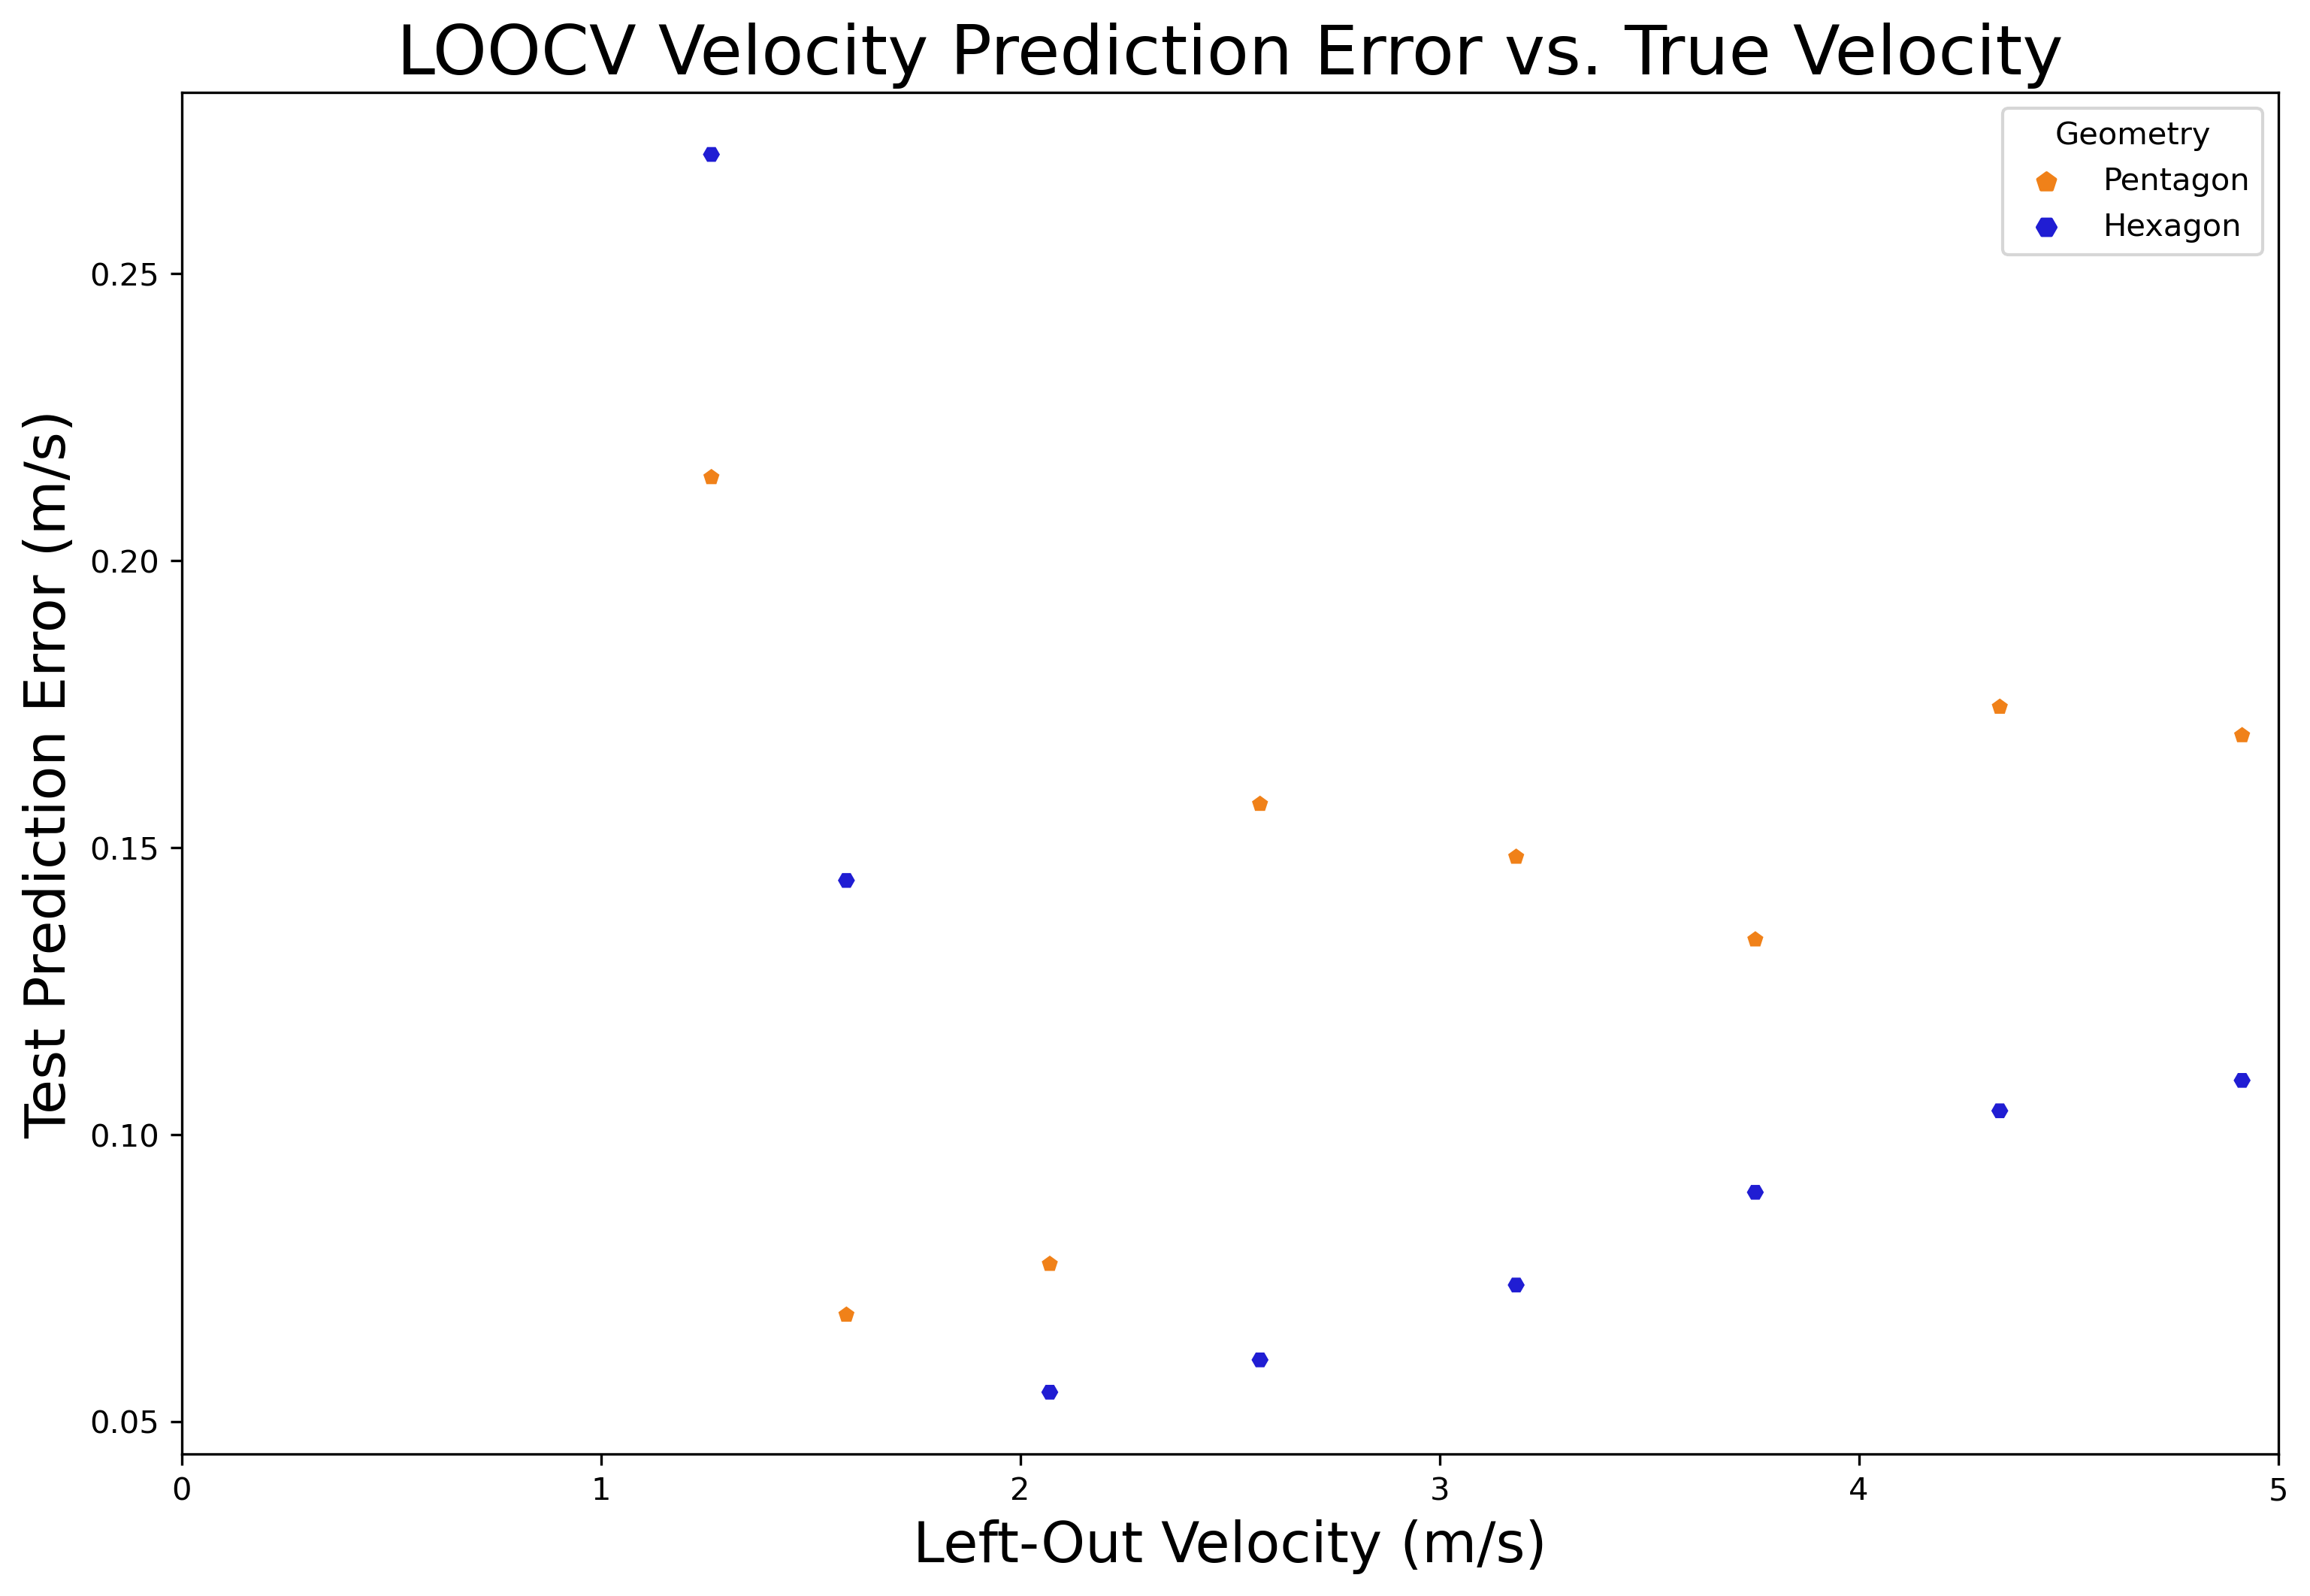

In [4]:
plt.figure(figsize=(12, 8), dpi=300)
titleFont=22
axisFont=18
legendFont=14
# ax = sns.scatterplot(x="Angle_deg", y="Err_deg", hue='Geometry', style='Geometry', palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], markers=['v', 'o', 'p', 'H'], data=DF[(DF.Geometry.isin(['Triangle', 'Square', 'Pentagon', 'Hexagon']) & DF.N==2.0)])
ax = sns.scatterplot(x="Vel_ms", y="Err_ms", hue='Geometry', style='Geometry', palette=['#f08119', '#201dd3'], markers=['p', 'H'], data=DF2[(DF2.Geometry.isin(['Pentagon', 'Hexagon'])) & (DF2.N == 1)])
plt.title('LOOCV Velocity Prediction Error vs. True Velocity', fontsize=titleFont)
ax.set_xlabel('Left-Out Velocity (m/s)', fontsize=axisFont)
plt.xlim([0, 5])
ax.set_ylabel('Test Prediction Error (m/s)', fontsize=axisFont)
# ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('VelErrorVSSpeed.png')
plt.show()


In [5]:
DF0 = pd.read_csv('VelErrorVSAngleLarge.csv')
DF0 = DF0.drop(columns=['Unnamed: 0'])
print(DF0)
DF = DF0
DF.loc[DF['Geometry']==3 ,'Geometry']='Triangle'
DF.loc[DF['Geometry']==4 ,'Geometry']='Square'
DF.loc[DF['Geometry']==5 ,'Geometry']='Pentagon'
DF.loc[DF['Geometry']==6 ,'Geometry']='Hexagon'
print(DF)
print(DF.columns)

           Vel_ms    Err_ms    N  Geometry
0        1.263637  0.366500  1.0       3.0
1        1.263637  0.173791  1.0       3.0
2        1.263637  0.180587  1.0       3.0
3        1.263637  0.235646  1.0       3.0
4        1.263637  0.364458  1.0       3.0
...           ...       ...  ...       ...
8639899  4.914135  0.172571  5.0       6.0
8639900  4.914135  0.025442  5.0       6.0
8639901  4.914135  0.129162  5.0       6.0
8639902  4.914135  0.066188  5.0       6.0
8639903  4.914135  0.207737  5.0       6.0

[8639904 rows x 4 columns]
           Vel_ms    Err_ms    N  Geometry
0        1.263637  0.366500  1.0  Triangle
1        1.263637  0.173791  1.0  Triangle
2        1.263637  0.180587  1.0  Triangle
3        1.263637  0.235646  1.0  Triangle
4        1.263637  0.364458  1.0  Triangle
...           ...       ...  ...       ...
8639899  4.914135  0.172571  5.0   Hexagon
8639900  4.914135  0.025442  5.0   Hexagon
8639901  4.914135  0.129162  5.0   Hexagon
8639902  4.914135  0.06618

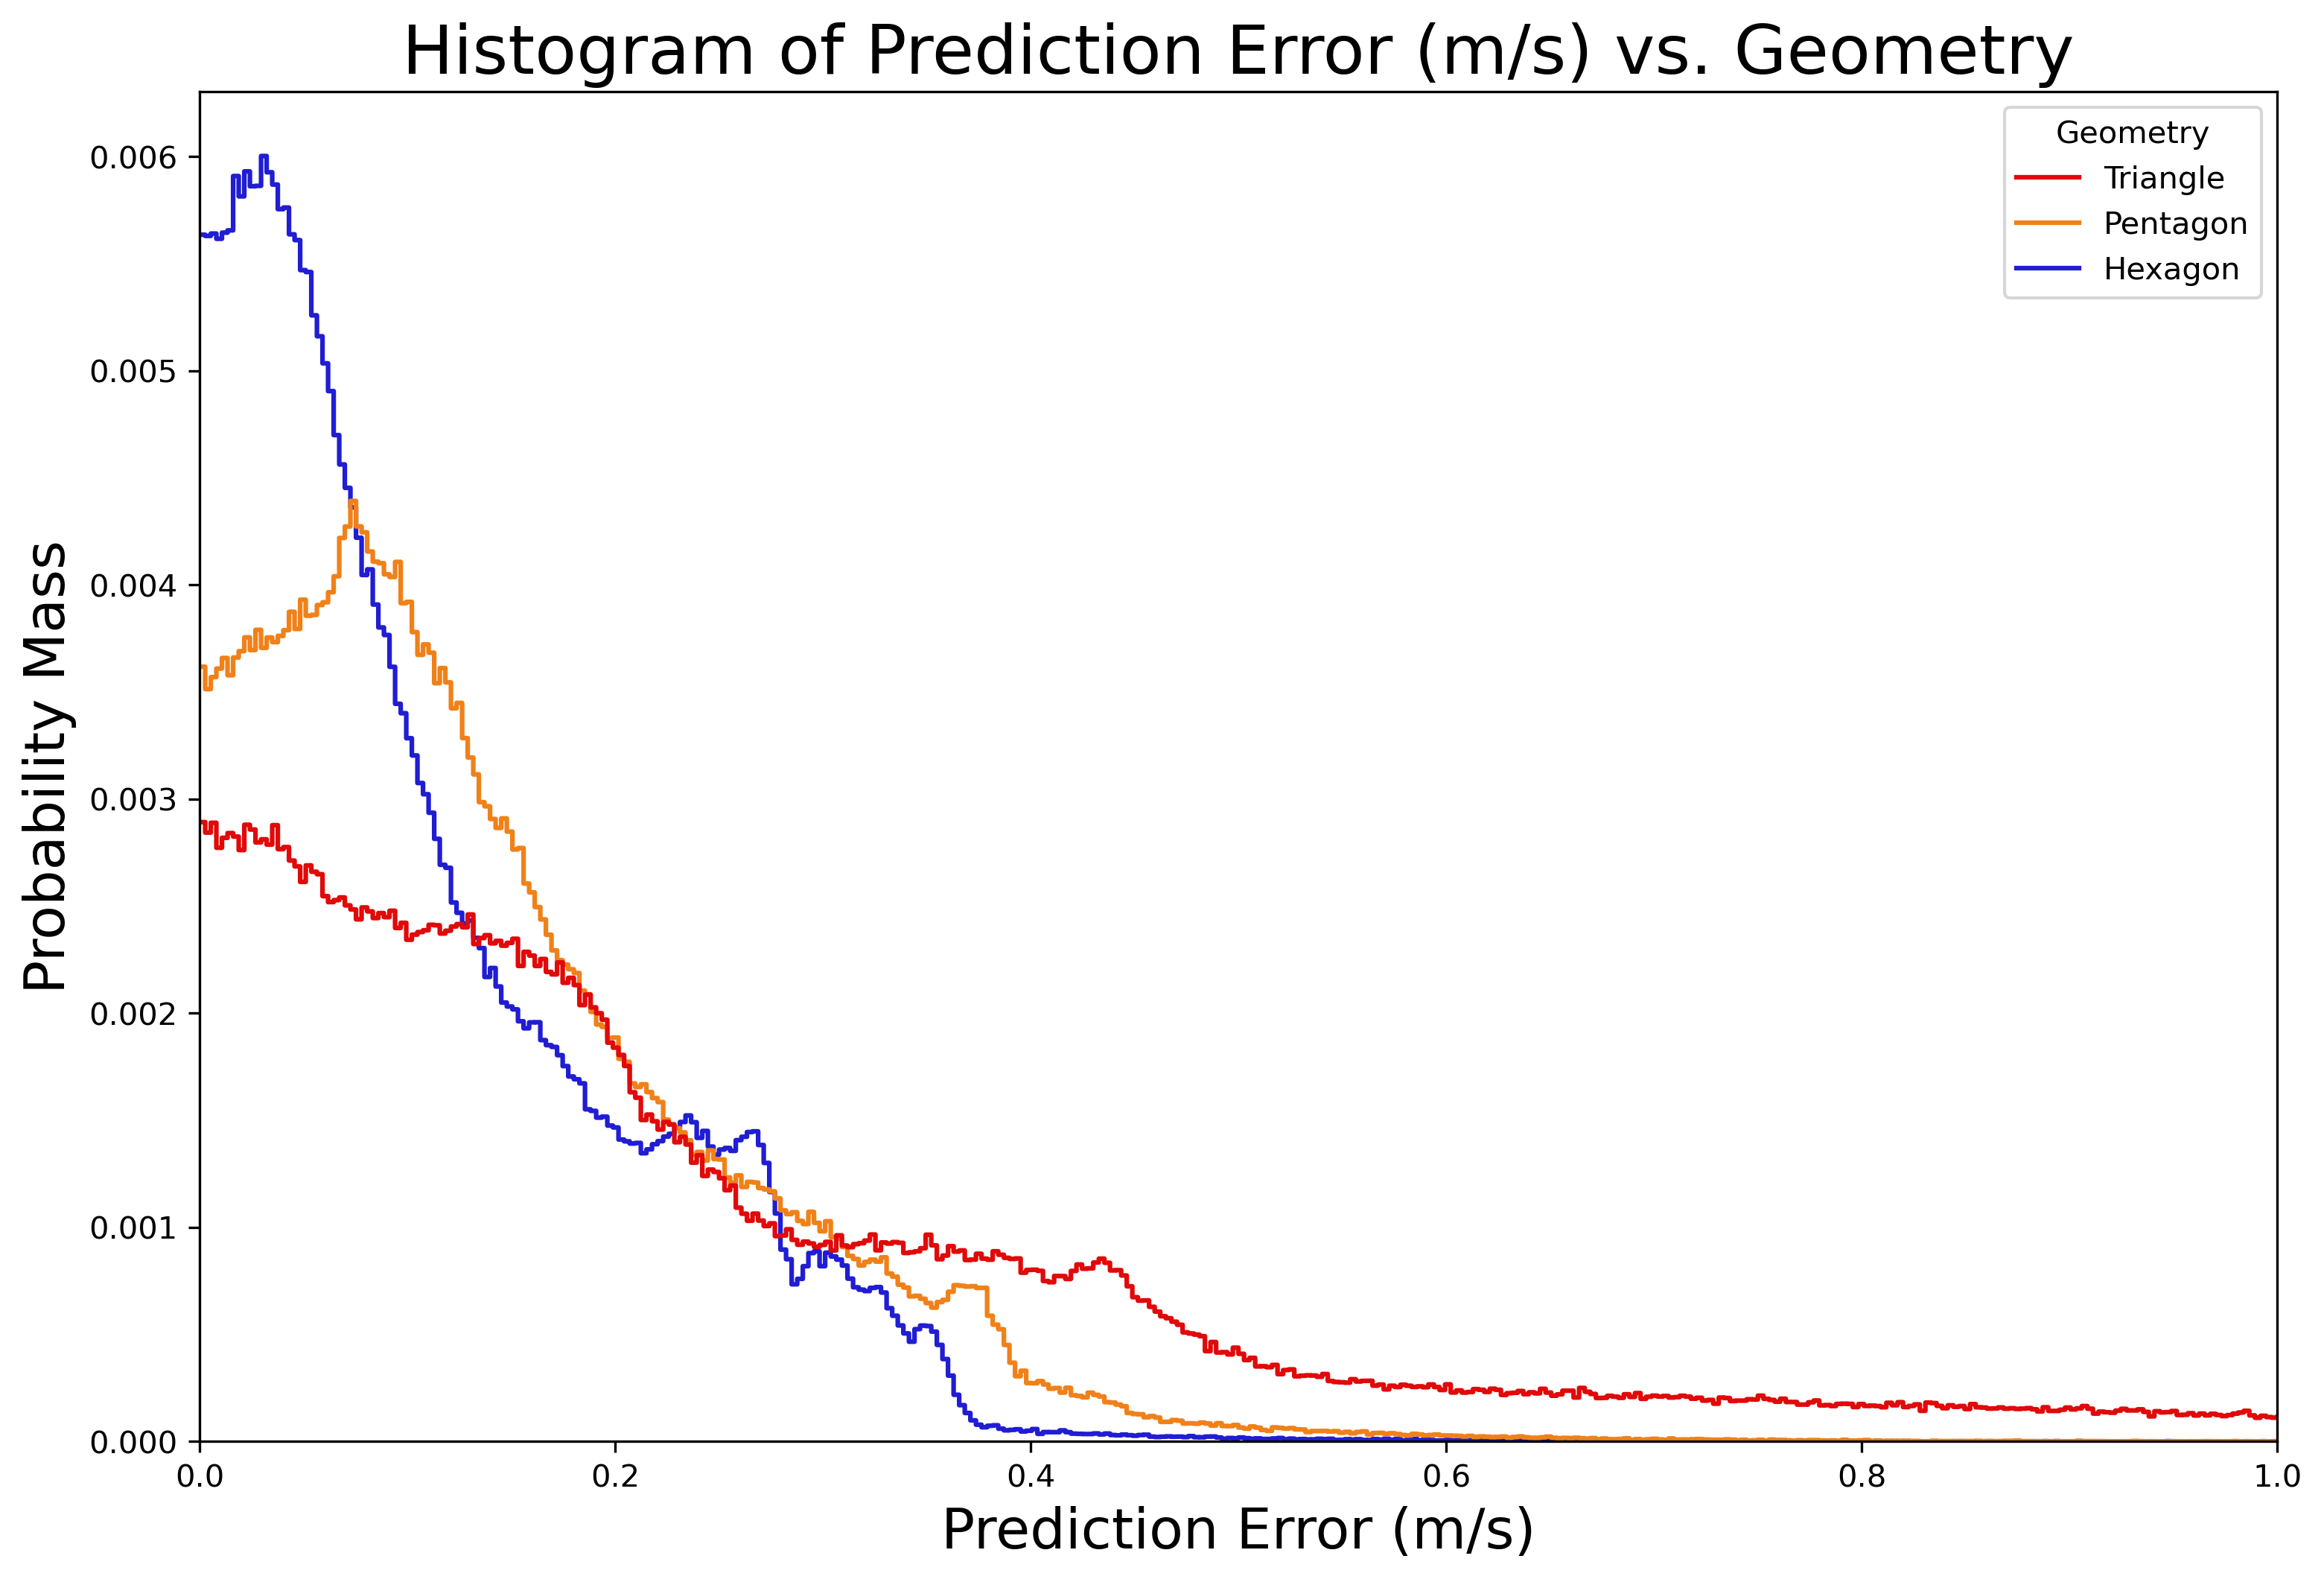

In [8]:
plt.figure(figsize=(12, 8), dpi=300)
titleFont=22
axisFont=18
legendFont=14
# ax = sns.scatterplot(x="Angle_deg", y="Err_deg", hue='Geometry', style='Geometry', palette=['#e10909', '#1dd332', '#f08119', '#201dd3'], markers=['v', 'o', 'p', 'H'], data=DF[(DF.Geometry.isin(['Triangle', 'Square', 'Pentagon', 'Hexagon']) & DF.N==2.0)])

# As shaded, layered histogram: 
### # ax = sns.histplot(x="Err_deg", stat='probability', hue='Geometry', palette=['#e10909', '#f08119', '#201dd3'], data=DF[(DF.Geometry.isin(['Triangle', 'Pentagon', 'Hexagon'])) & (DF.N == 1)])

# As line plot via histogram (element and fill inputs adjusted from defaults)
ax = sns.histplot(x="Err_ms", stat='probability', hue='Geometry', palette=['#e10909', '#f08119', '#201dd3'], element='step', fill=False, data=DF[(DF.Geometry.isin(['Triangle', 'Pentagon', 'Hexagon'])) & (DF.N == 1)])

plt.title('Histogram of Prediction Error (m/s) vs. Geometry', fontsize=titleFont)
ax.set_xlabel('Prediction Error (m/s)', fontsize=axisFont)
plt.xlim([0, 1])
ax.set_ylabel('Probability Mass', fontsize=axisFont)
# ax.legend(fontsize=legendFont)
plt.grid(False)
plt.savefig('VelErrorHist.png')
plt.show()

In [6]:
DF4 = DF.groupby(['Geometry', 'N']).mean()
DF3 = DF.groupby(['Geometry', 'N']).std()
print(DF4)
print()
print(DF3)
print(8640000/12)

                Vel_ms    Err_ms
Geometry N                      
Hexagon  1.0  2.959808  0.113515
         2.0  2.959808  0.116046
         5.0  2.959808  0.110010
Pentagon 1.0  2.959808  0.143065
         2.0  2.959808  0.153989
         5.0  2.959808  0.193275
Square   1.0  2.959808  0.156156
         2.0  2.959808  0.162678
         5.0  2.959808  0.153320
Triangle 1.0  2.959808  0.263850
         2.0  2.959808  0.269836
         5.0  2.959808  0.270515

                Vel_ms    Err_ms
Geometry N                      
Hexagon  1.0  1.229821  0.095162
         2.0  1.229821  0.093541
         5.0  1.229821  0.094304
Pentagon 1.0  1.229821  0.110973
         2.0  1.229821  0.119701
         5.0  1.229821  0.172660
Square   1.0  1.229821  0.137775
         2.0  1.229821  0.140110
         5.0  1.229821  0.137910
Triangle 1.0  1.229821  0.259704
         2.0  1.229821  0.267101
         5.0  1.229821  0.243578
720000.0


In [7]:
# print(DF0)
# print()
NN = [1, 2, 5]
GG = ['Triangle', 'Square', 'Pentagon', 'Hexagon']
LL = int(720000*0.95)

for ii in range(4):
    for jj in range(3):
        print('------------------------------------\n')
        print(GG[ii])
        print(NN[jj])
        print()
        DFtmp = DF[(DF.Geometry.isin([GG[ii]])) & (DF.N == NN[jj])]
        # DFtmp = DF0[(DF0.Geometry == GG[ii])]
        tmp = DFtmp["Err_ms"].to_numpy()
        print((np.sort(tmp))[LL])
        print()

------------------------------------

Triangle
1

0.8536238670349121

------------------------------------

Triangle
2

0.8673715591430664

------------------------------------

Triangle
5

0.7891178131103515

------------------------------------

Square
1

0.40673971176147455

------------------------------------

Square
2

0.413427233695984

------------------------------------

Square
5

0.4016759395599365

------------------------------------

Pentagon
1

0.3605368137359619

------------------------------------

Pentagon
2

0.38289105892181396

------------------------------------

Pentagon
5

0.5770831108093262

------------------------------------

Hexagon
1

0.3028608560562134

------------------------------------

Hexagon
2

0.2995152473449708

------------------------------------

Hexagon
5

0.30396175384521484



In [ ]:
'''
# Process testErrs into a dataframe and condense to averages
# Order in bigData is [tri -- squ -- pent -- hex]

# Safety mechanism to not override data
if False:
    
    NN = np.array([1, 2, 5])
    lenDat = 287999
    nFilt = len(NN)
    nGeom = 4
    nSeed = 5
    dfMain = pd.DataFrame(columns=('Angle_deg', 'Err_deg', 'N', 'Geometry'))
    dfMain2 = pd.DataFrame(columns=('Angle_deg', 'Err_deg', 'N', 'Geometry'))
    for ii in range(nFilt):
        for jj in np.arange(3, 3+nGeom):
            geometryVal = jj
            tmpDAT = np.zeros((nSeed*lenDat, 5))
            bestSeed = 900.0*np.ones(nSeed)
            for kk in range(nSeed):
                if geometryVal == 3:
                    geomPath='tri/'
                    geoString = 'TRI'
                elif geometryVal == 4:
                    geomPath='squ/'
                    geoString = 'SQU'
                elif geometryVal == 5:
                    geomPath='pent/'
                    geoString = 'PENT'
                elif geometryVal == 6:
                    geomPath='hex/'
                    geoString = 'HEX'
                else:
                    raise ValueError('Geometry must be in {3, 4, 5, 6}')

                trainPath = '../compVal_N'+str(NN[ii])+'/' + geomPath + 'trainCost'+str(kk)+'.csv' 
                testPath = '../compVal_N'+str(NN[ii])+'/' + geomPath + 'testErrs'+str(kk)+'.csv'
                # testPathInit = 'compVal_N'+str(NN[ii])+'/' + geomPath + 'testCostInit'+str(kk)+'.csv'

                tmp0 = pd.read_csv(trainPath, header=None).to_numpy()
                bestSeed[kk] = tmp0[-1, 1]
                # print(tmp0[-1, 1])

                tmp = np.zeros((lenDat, 5))
                # tmp[0,:2] = pd.read_csv(testPathInit, header=None).to_numpy()
                tmp[:,:2] = pd.read_csv(testPath, header=None).to_numpy()
                tmp[:,:2] *= 180.0/math.pi
                tmp[:,0] = np.round_(tmp[:,0])
                # bestSeed[kk] = np.mean(tmp[:,1])
                tmp[:,2] = np.ones(lenDat)*NN[ii]
                tmp[:,3] = np.ones(lenDat)*geometryVal
                tmp[:,4] = np.ones(lenDat)*(kk+1)
                tmpDAT[kk*lenDat:(kk+1)*lenDat,:] = tmp


            # Choose the best seed for each geometry-filter configuration
            kkStar = np.argmin(bestSeed)
            # print(bestSeed)
            # print(f"The best seed is Seed {kkStar+1}, representing element"+ f" [{kkStar}] of bestSeed array")
            # breakpoint()

            dfTmp = pd.DataFrame(data=tmpDAT[kkStar*lenDat:(kkStar+1)*lenDat,:4],
                                 columns=('Angle_deg', 'Err_deg', 'N', 'Geometry')
                                )

            dfMain = pd.concat([dfMain, dfTmp])

            dfTmp2 = dfTmp.groupby(['Angle_deg'], as_index=False).mean()
            # print(dfTmp2.shape)
            # Append to main dataframe
            dfMain2 = pd.concat([dfMain2, dfTmp2])
            # print(dfMain.shape)


            # BIGDAT[(ii*nGeom*nSeed*lenTraj + (jj-3)*nSeed*lenTraj + kk*lenTraj):(ii*nGeom*nSeed*lenTraj + (jj-3)*nSeed*lenTraj + (kk+1)*lenTraj), :] = tmp

    # Save to csv file
    dfMain.to_csv('ErrorVSAngleLarge.csv')  
    dfMain2.to_csv('ErrorVSAngle.csv')  
'''